<a href="https://colab.research.google.com/github/Lluhx/coursera-deep-learning-specialization/blob/master/%E2%80%9CEvolvePro_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup:

In [ ]:
!git clone https://github.com/mat10d/EvolvePro.git
%cd EvolvePro/

In [ ]:
%%capture

!pip install pandas numpy scikit-learn scikit-learn-extra xgboost matplotlib seaborn biopython scipy torch fair-esm
!mkdir /content/output

## Process

In [ ]:
from evolvepro.src.process import generate_wt, generate_single_aa_mutants
generate_wt('MAKEDNIEMQGTVLETLPNTMFRVELENGHVVTAHISGKMRKNYIRILTGDKVTVELTPYDLSKGRIVFRSR', output_file='/content/output/kelsic_WT.fasta')
generate_single_aa_mutants('/content/output/kelsic_WT.fasta', output_file='/content/output/kelsic.fasta')

/content/EvolvePro/evolvepro/src/process.py:471: SyntaxWarning: invalid escape sequence '\d'
  "(\d+)([A-Z]+)", expand=True


Number of mutants: 1369


In [ ]:
from evolvepro.src.process import suggest_initial_mutants
suggest_initial_mutants('/content/output/kelsic.fasta', num_mutants=12, random_seed=42)


Suggested 12 mutants for testing:
1. R23K
2. T58E
3. I36D
4. V31C
5. I7A
6. K3F
7. Q10P
8. G38E
9. E4M
10. D61W
11. E4Y
12. R23N


## PLM

In [ ]:
!python evolvepro/plm/esm/extract.py esm1b_t33_650M_UR50S /content/output/kelsic.fasta /content/output/kelsic_esm1b_t33_650M_UR50S --toks_per_batch 512 --include mean --concatenate_dir /content/output

Traceback (most recent call last):
  File "/content/EvolvePro/evolvepro/plm/esm/extract.py", line 11, in <module>
    import torch
  File "/usr/local/lib/python3.12/dist-packages/torch/__init__.py", line 416, in <module>
    from torch._C import *  # noqa: F403
    ^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 463, in _lock_unlock_module
KeyboardInterrupt
^C


## Run EVOLVEpro

In [ ]:
from evolvepro.src.evolve import evolve_experimental

protein_name = 'kelsic'
embeddings_base_path = '/content/output'
embeddings_file_name = 'kelsic_esm1b_t33_650M_UR50S.csv'
round_base_path = '/content/EvolvePro/colab/rounds_data'
wt_fasta_path = "/content/output/kelsic_WT.fasta"
number_of_variants = 12
output_dir = '/content/output/'
rename_WT = False

#### Round 1

In [ ]:
round_name = 'Round1'
round_file_names = ['kelsic_Round1.xlsx']

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing kelsic - Round1
Embeddings loaded: (1369, 1280)
Loaded experimental data for kelsic_Round1.xlsx: (12, 3)
iteration shape: (12, 2)
Labels shape: (1369, 5)
Embeddings and labels are aligned
(1357,)

Tested variants in this round: 12
93      D61W
161      E4M
170      E4Y
288     G38E
382     I36D
456      I7A
498      K3F
886     Q10P
901     R23K
904     R23N
1181    T58E
1236    V31C
Name: variant, dtype: object

Top 12 variants predicted by the model:
     variant    y_pred  y_actual  y_actual_scaled  y_actual_binary  \
168      E4V  0.943675       NaN              NaN              NaN   
343     H30C  0.943463       NaN              NaN              NaN   
58       D5C  0.942770       NaN              NaN              NaN   
1255    V32C  0.941545       NaN              NaN              NaN   
191      E8C  0.940377       NaN              NaN              NaN   
1245    V31M  0.938028       NaN              NaN              NaN   
164      E4Q  0.937777       NaN          

/content/EvolvePro/evolvepro/src/model.py:303: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test])


#### Round 2

In [ ]:
round_name = 'Round2'
round_file_names = ['kelsic_Round1.xlsx', 'kelsic_Round2.xlsx']

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing kelsic - Round2
Embeddings loaded: (1369, 1280)
Loaded experimental data for kelsic_Round1.xlsx: (12, 3)
Loaded experimental data for kelsic_Round2.xlsx: (12, 3)
iteration shape: (24, 2)
Labels shape: (1369, 5)
Embeddings and labels are aligned
(1345,)

Tested variants in this round: 24
66       D5M
93      D61W
155      E4F
157      E4H
160      E4L
161      E4M
162      E4N
164      E4Q
168      E4V
170      E4Y
191      E8C
202      E8Q
288     G38E
382     I36D
456      I7A
498      K3F
886     Q10P
901     R23K
904     R23N
1046    S71C
1065    T12C
1074    T12M
1181    T58E
1236    V31C
Name: variant, dtype: object

Top 12 variants predicted by the model:
     variant    y_pred  y_actual  y_actual_scaled  y_actual_binary  \
169      E4W  0.999147       NaN              NaN              NaN   
158      E4I  0.977725       NaN              NaN              NaN   
701      M1W  0.976712       NaN              NaN              NaN   
1242    V31I  0.975030       NaN       

/content/EvolvePro/evolvepro/src/model.py:303: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test])


#### Round 3

In [ ]:
round_name = 'Round3'
round_file_names = ['kelsic_Round1.xlsx', 'kelsic_Round2.xlsx', 'kelsic_Round3.xlsx']

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing kelsic - Round3
Embeddings loaded: (1369, 1280)
Loaded experimental data for kelsic_Round1.xlsx: (12, 3)
Loaded experimental data for kelsic_Round2.xlsx: (12, 3)
Loaded experimental data for kelsic_Round3.xlsx: (12, 3)
iteration shape: (36, 2)
Labels shape: (1369, 5)
Embeddings and labels are aligned
(1333,)

Tested variants in this round: 36
58       D5C
60       D5F
63       D5I
65       D5L
66       D5M
67       D5N
73       D5V
75       D5Y
93      D61W
126     E25Q
153      E4C
155      E4F
157      E4H
158      E4I
160      E4L
161      E4M
162      E4N
164      E4Q
168      E4V
169      E4W
170      E4Y
191      E8C
202      E8Q
288     G38E
382     I36D
456      I7A
498      K3F
701      M1W
886     Q10P
901     R23K
904     R23N
1046    S71C
1065    T12C
1074    T12M
1181    T58E
1236    V31C
Name: variant, dtype: object

Top 12 variants predicted by the model:
    variant    y_pred  y_actual  y_actual_scaled  y_actual_binary dist_metric  \
72      D5T  1.004481    

/content/EvolvePro/evolvepro/src/model.py:303: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test])


#### Round 4

In [ ]:
round_name = 'Round4'
round_file_names = ['kelsic_Round1.xlsx', 'kelsic_Round2.xlsx', 'kelsic_Round3.xlsx', 'kelsic_Round4.xlsx']

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing kelsic - Round4
Embeddings loaded: (1369, 1280)
Loaded experimental data for kelsic_Round1.xlsx: (12, 3)
Loaded experimental data for kelsic_Round2.xlsx: (12, 3)
Loaded experimental data for kelsic_Round3.xlsx: (12, 3)
Loaded experimental data for kelsic_Round4.xlsx: (12, 3)
iteration shape: (48, 2)
Labels shape: (1369, 5)
Embeddings and labels are aligned
(1321,)

Tested variants in this round: 48
57       D5A
58       D5C
60       D5F
62       D5H
63       D5I
65       D5L
66       D5M
67       D5N
69       D5Q
71       D5S
72       D5T
73       D5V
75       D5Y
93      D61W
126     E25Q
134     E27C
141     E27L
142     E27M
145     E27Q
153      E4C
155      E4F
157      E4H
158      E4I
160      E4L
161      E4M
162      E4N
164      E4Q
167      E4T
168      E4V
169      E4W
170      E4Y
191      E8C
202      E8Q
288     G38E
382     I36D
456      I7A
498      K3F
701      M1W
712     M21L
886     Q10P
901     R23K
904     R23N
1046    S71C
1065    T12C
1074    T12M
11

/content/EvolvePro/evolvepro/src/model.py:303: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test])


#### Round 5

In [ ]:
round_name = 'Round5'
round_file_names = ['kelsic_Round1.xlsx', 'kelsic_Round2.xlsx', 'kelsic_Round3.xlsx', 'kelsic_Round4.xlsx', 'kelsic_Round5.xlsx']

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing kelsic - Round5
Embeddings loaded: (1369, 1280)
Loaded experimental data for kelsic_Round1.xlsx: (12, 3)
Loaded experimental data for kelsic_Round2.xlsx: (12, 3)
Loaded experimental data for kelsic_Round3.xlsx: (12, 3)
Loaded experimental data for kelsic_Round4.xlsx: (12, 3)
Loaded experimental data for kelsic_Round5.xlsx: (12, 3)
iteration shape: (60, 2)
Labels shape: (1369, 5)
Embeddings and labels are aligned
(1309,)

Tested variants in this round: 60
57       D5A
58       D5C
60       D5F
62       D5H
63       D5I
65       D5L
66       D5M
67       D5N
68       D5P
69       D5Q
71       D5S
72       D5T
73       D5V
74       D5W
75       D5Y
93      D61W
126     E25Q
134     E27C
141     E27L
142     E27M
145     E27Q
152      E4A
153      E4C
155      E4F
157      E4H
158      E4I
160      E4L
161      E4M
162      E4N
163      E4P
164      E4Q
166      E4S
167      E4T
168      E4V
169      E4W
170      E4Y
191      E8C
193      E8F
195      E8H
197      E8K
202      E

/content/EvolvePro/evolvepro/src/model.py:303: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test])


## Round6



In [ ]:
from evolvepro.src.process import (
    generate_wt,
    generate_single_aa_mutants,
    generate_n_mutant_combinations,
)
generate_n_mutant_combinations(wt_fasta_path,'/content/EvolvePro/colab/rounds_data/kelsic_Round1.xlsx',n=2,output_file='/content/output/kelsic_2nd.fasta',threshold=0.95)
generate_n_mutant_combinations(wt_fasta_path,'/content/EvolvePro/colab/rounds_data/kelsic_Round5.xlsx',n=2,output_file='/content/output/kelsic_3nd.fasta',threshold=0.96)

Number of mutant combinations: 6
Number of valid mutant combinations: 6
Number of mutant combinations: 3
Number of valid mutant combinations: 4


In [ ]:
!python evolvepro/plm/esm/extract.py esm1b_t33_650M_UR50S /content/output/kelsic_2nd.fasta /content/output/kelsic_2nd_esm1b_t33_650M_UR50S --toks_per_batch 512 --include mean --concatenate_dir /content/output

Read /content/output/kelsic_2nd.fasta with 6 sequences
Processing 1 of 1 batches (6 sequences)
Device: cpu
Saved representations to /content/output/kelsic_2nd_esm1b_t33_650M_UR50S
Shape of concatenated DataFrame: (6, 1280)
Saved concatenated representations to /content/output/kelsic_2nd_esm1b_t33_650M_UR50S.csv


In [ ]:
!python evolvepro/plm/esm/extract.py esm1b_t33_650M_UR50S /content/output/kelsic_3nd.fasta /content/output/kelsic_3nd_esm1b_t33_650M_UR50S --toks_per_batch 512 --include mean --concatenate_dir /content/output

Read /content/output/kelsic_3nd.fasta with 4 sequences
Processing 1 of 1 batches (4 sequences)
Device: cpu
Saved representations to /content/output/kelsic_3nd_esm1b_t33_650M_UR50S
Shape of concatenated DataFrame: (4, 1280)
Saved concatenated representations to /content/output/kelsic_3nd_esm1b_t33_650M_UR50S.csv


In [ ]:
from evolvepro.src.evolve import evolve_experimental_multi
embeddings_file_name_2nd = 'kelsic_2nd_esm1b_t33_650M_UR50S.csv'
embeddings_file_name_3rd = 'kelsic_3nd_esm1b_t33_650M_UR50S.csv'
rename_WT = False
round_name = 'Round6'
round_file_names_single = ['kelsic_Round1.xlsx', 'kelsic_Round2.xlsx', 'kelsic_Round3.xlsx', 'kelsic_Round4.xlsx','kelsic_Round5.xlsx']
round_file_names_multi = ['kelsic_Round5.xlsx']

this_round_variants, df_test, df_sorted_all = evolve_experimental_multi(
    protein_name,
    round_name,
    embeddings_base_path,
    [embeddings_file_name, embeddings_file_name_2nd,embeddings_file_name_3rd],
    round_base_path,
    round_file_names_single,
    round_file_names_multi,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing kelsic - Round6
Embeddings loaded: (1377, 1280)
Loaded experimental data for kelsic_Round1.xlsx: (12, 3)
Loaded experimental data for kelsic_Round2.xlsx: (12, 3)
Loaded experimental data for kelsic_Round3.xlsx: (12, 3)
Loaded experimental data for kelsic_Round4.xlsx: (12, 3)
Loaded experimental data for kelsic_Round5.xlsx: (12, 3)
Loaded experimental data for kelsic_Round5.xlsx: (12, 2)
Embeddings and labels are aligned
(1317,)

Tested variants in this round: 60
57       D5A
58       D5C
60       D5F
62       D5H
63       D5I
65       D5L
66       D5M
67       D5N
68       D5P
69       D5Q
71       D5S
72       D5T
73       D5V
74       D5W
75       D5Y
93      D61W
126     E25Q
134     E27C
141     E27L
142     E27M
145     E27Q
152      E4A
153      E4C
155      E4F
157      E4H
158      E4I
160      E4L
161      E4M
162      E4N
163      E4P
164      E4Q
166      E4S
167      E4T
168      E4V
169      E4W
170      E4Y
191      E8C
193      E8F
195      E8H
197      E8K
20

/content/EvolvePro/evolvepro/src/model.py:303: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test])


## Plot

In [ ]:
from evolvepro.src.plot import read_exp_data, plot_variants_by_iteration

round_base_path = '/content/EvolvePro/colab/rounds_data'
round_file_names = ['kelsic_Round1.xlsx', 'kelsic_Round2.xlsx', 'kelsic_Round3.xlsx', 'kelsic_Round4.xlsx', 'kelsic_Round5.xlsx']
wt_fasta_path = "/content/output/kelsic_WT.fasta"

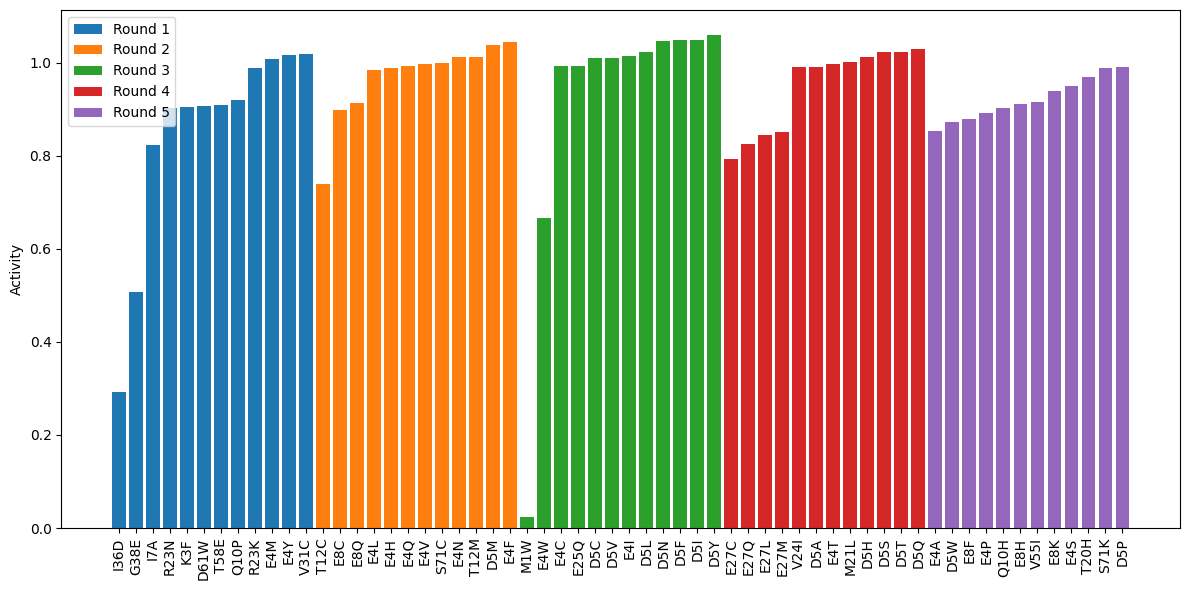

In [ ]:
df = read_exp_data(round_base_path, round_file_names, wt_fasta_path)
plot_variants_by_iteration(df, activity_column='activity', output_dir=output_dir, output_file="kelsic")
